# CS450 Fall 2023 Assignment 2

Student name: Bibin Sibi
Partner if applicable: N/A
Red ID: 825763777
- remember to join a group in Canvas if you have a partner

* This assignment is a combination of two assignments from the previous section of the class. Please remember that exploring the data is a large part of the processs.
* In case I forgot to mention it, exploring the data is a large part of the process
* Justifying and explaining your process is also important
* The Sentiment Analysis component does not have a right answer. There are several ways that you can approach it. The key is that you explore the data and explain your process

## STEP 0
*COPY NOTEBOOK TO YOUR DRIVE*

### Problem 2 - Poker Hand Classification (30 points)
* Use the Pokerhand dataset at https://archive.ics.uci.edu/ml/machine-learning-databases/poker/
  * new link https://archive.ics.uci.edu/ml/datasets/Poker+Hand
* Pay attention to class distribution.
  * Do you need to do anything to balance the data? (spoiler alert: you do, but you need to do some exploration to see this)
* How does it affect ANNs if the training data is ordered?
* I mentioned early stopping in class but didn't go into detail. Implement early stopping in your model
  * This article provides an example of early stopping with Keras and Tensorflow
  * https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd
  * Provide a visualization of training and cross validation loss at each epoch
* Provide a confusion matrix and F1 score for the test data
* The output of the model will be probabilities of each class. I like to use np.argmax to get the most probable class, but you may use other techniques.
* Due to limitations in Colab, you do not need to run too many iterations
  * Showing the process and running a few training iterations is sufficient

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
tf.random.set_seed(1)

In [ ]:
names = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Class']

In [ ]:
dfPoker = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data",header=None,names=names)

In [ ]:
dfPoker.sample(10)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
24629,1,12,1,4,1,2,1,10,3,5,0
1839,3,10,4,8,4,13,3,3,2,5,0
17011,4,12,2,9,4,11,3,7,1,9,1
9516,4,1,4,2,4,6,4,9,3,6,1
20018,3,8,2,1,2,8,1,5,4,12,1
13462,1,7,2,13,3,7,4,5,2,8,1
18782,1,11,3,9,4,5,1,8,4,2,0
2400,2,6,4,2,1,4,2,13,1,7,0
7649,2,7,1,5,2,11,2,9,4,12,0
5693,3,1,3,3,2,3,3,13,3,10,1


In [ ]:
dfPoker.dtypes

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
Class    int64
dtype: object

# To balance my data, I will use Synthetic Minority Oversampling in order to avoid having to deal with weights, but also to prevent duplication of data while still addressing the balance issues with minority data.

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# Your code here.
#Train my dataset
X = dfPoker.drop('Class', axis=1)
y = dfPoker['Class']

#I will train the model with 80% of my data and test with the remaining 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#I will balance my data using SMOTE as mentioned and explained above
#I tried having k_neighbors be at the default, but due to the size of the data, I had to set it to 3__
smote = SMOTE(k_neighbors=3, random_state=42)  # Set k_neighbors to control neighbors
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#Standardizing my data is reccomended for neural networks
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [ ]:
#CREATION OF THE NEURAL NETWORK
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
#COMPILATION
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#incorperation of early stopping the best I can
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
earlyStopping = model.fit(X_resampled, y_resampled, epochs=50, batch_size=64, validation_split=0.2, callbacks=[earlystopping])

Epoch 1/50
1243/1243 [==============================] - 7s 4ms/step - loss: 1.1991 - accuracy: 0.5431 - val_loss: 10.4034 - val_accuracy: 5.0297e-04
Epoch 2/50
1243/1243 [==============================] - 4s 3ms/step - loss: 0.8157 - accuracy: 0.6677 - val_loss: 10.3691 - val_accuracy: 5.0297e-04
Epoch 3/50
1243/1243 [==============================] - 5s 4ms/step - loss: 0.7327 - accuracy: 0.6916 - val_loss: 9.0982 - val_accuracy: 5.0297e-04
Epoch 4/50
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6893 - accuracy: 0.7062 - val_loss: 7.7465 - val_accuracy: 5.0297e-04
Epoch 5/50
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6613 - accuracy: 0.7171 - val_loss: 7.1783 - val_accuracy: 5.0297e-04
Epoch 6/50
1243/1243 [==============================] - 4s 3ms/step - loss: 0.6409 - accuracy: 0.7241 - val_loss: 6.6281 - val_accuracy: 5.0297e-04
Epoch 7/50
1243/1243 [==============================] - 6s 5ms/step - loss: 0.6244 - accuracy: 0.7308 - val_lo

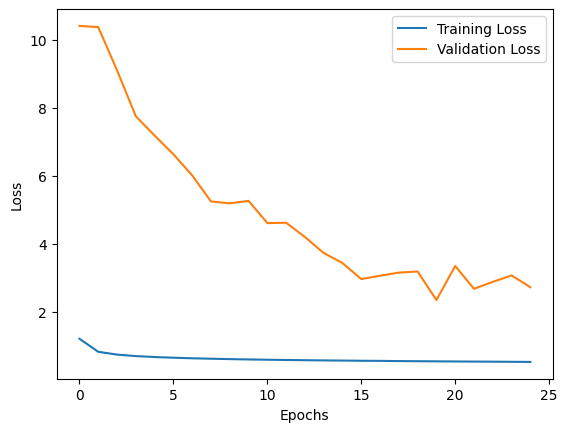

In [ ]:
#Visualization of the Early Stopping
# Visualize training and validation loss
plt.plot(earlyStopping.history['loss'], label='Training Loss')
plt.plot(earlyStopping.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Finally we get to the prediction of the model using the remaining 20% of the data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

#Creation of the confusion matrix as requested by the prompt and printing of the f1 score
confusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusionMatrix)

f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1)

157/157 [==============================] - 0s 2ms/step
Confusion Matrix:
[[1309  517  480  214   15    2   14    1]
 [ 828  509  383  303   32    3   13    4]
 [  81   50   53   37    8    0    1    0]
 [  22   28   23   24    4    0    0    0]
 [   2    5    4   11    0    0    0    0]
 [   0    0    1    0    0    8    0    0]
 [   2    2    4    4    0    0    0    0]
 [   0    0    0    0    1    0    0    0]]
F1 Score: 0.3804478208716513


### Sentiment Analysis (120 points)
* Sentiment analysis involves determining the sentiment of text.
* In this lab, you will use a hotel review data set that includes reviews and a rating
 * There are other features that you can ignore, unless you want to use them to improve results
* Your goal is to train a model that can predict the number of stars based on the text
* Do not forget to explore and clean the data
 * Do not forget that we need to add the fun of stop words, stemming / lemmatizing and similar exciting topics.

### Get the data
* Either download the data and store it in your drive or use the Kaggle API to obtain the data from
 * https://www.kaggle.com/datasets/datafiniti/hotel-reviews
* I am showing an example of pulling it from Kaggle. You don't need to use this. You can change it to whatever works for you
 * If you use this method, you need to upload the JSON file with your API key to your Colab workspace.
 * https://www.kaggle.com/docs/api#authentication

In [ ]:
# Use this to upload your json API key file (optional)

from google.colab import files

# Upload your kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os

# Move the uploaded kaggle.json file to the correct directory
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the file
os.chmod('/root/.kaggle/kaggle.json', 600)


In [ ]:
!kaggle datasets download -d datafiniti/hotel-reviews

hotel-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q hotel-reviews.zip -d dataset

replace dataset/7282_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/Datafiniti_Hotel_Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/Datafiniti_Hotel_Reviews_Jun19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls ./dataset

7282_1.csv  Datafiniti_Hotel_Reviews.csv  Datafiniti_Hotel_Reviews_Jun19.csv


In [ ]:
dfReviews = pd.read_csv("./dataset/7282_1.csv")

In [ ]:
dfReviews.sample(10)

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
8748,27 W 72nd St,Hotels,New York,US,NaN,NaN,Hotel Olcott,10023,Nyc,2013-02-05T06:00:00Z,2015-07-09T04:37:50Z,NaN,NaN,5.0,I just called to try and book Hotel Olcott as ...,This is no longer a hotel,NaN,smass1,NaN
25830,3280 Dunes Dr,Hotels,Marina,US,36.699250,-121.805553,Monterey Beach Dunes Inn,93933,CA,2015-10-24T00:00:00Z,2016-11-21T15:58:10Z,NaN,NaN,3.0,The hotel was ok. We had a power outage for 18...,An overnight on the way to Laguna Seca.,NaN,A Traveler,NaN
10136,1 Main St,Hotels,Las Vegas,US,36.171617,-115.146375,Plaza Hotel and Casino - Las Vegas,89101,NV,2016-06-26T00:00:00Z,2016-11-21T15:26:42Z,NaN,NaN,4.0,Staff was distracted or uncoordinated. Frustra...,We will be back!,NaN,Arron,NaN
10340,1 Main St,Hotels,Las Vegas,US,36.171617,-115.146375,Plaza Hotel and Casino - Las Vegas,89101,NV,2016-06-09T00:00:00Z,2016-11-21T15:26:42Z,NaN,NaN,5.0,I loved it. My view was the front of Fremont S...,I loved it,NaN,Sophia,NaN
17251,3200 W Broad St,"Hotel,Hotels",Richmond,US,37.566110,-77.474810,Quality Inn and Suites,23230,VA,2016-04-22T00:00:00Z,2016-08-03T21:09:14Z,NaN,NaN,3.0,Close to RIR!! Scary Neighborhood!!,"Good Price, Could Be Better in Appearance!",Maumee,A Traveler,OH
27728,4934 N W Loop 410,Hotels,San Antonio,US,29.487838,-98.583884,Fiesta Inn and Suites,78229,TX,2014-07-25T00:00:00Z,2016-11-06T21:15:05Z,NaN,NaN,1.0,"Terrible, the whole place stinks like a bar, t...","Terrible, do not spend your money here",NaN,Dissatisfied guest,san Antonio tx
231,864,Hotels,Binghamton,US,42.130338,-75.905832,Fairfield Inn By Marriott Binghamton,13905,Choconut Center,2015-04-03T00:00:00Z,2016-11-03T15:09:03Z,NaN,NaN,4.0,Very friendly staff and excellent breakfast ch...,Comfortable,NaN,A Traveler,NaN
11610,700 Ute Ave,"Travel and Tourism,Wedding Guests,Wedding Work...",Aspen,US,39.185900,-106.817120,Aspen Alps,81611,CO,2015-10-07T00:00:00Z,2015-11-06T11:47:09Z,NaN,NaN,5.0,"Great location, great staff,BEAUTIFUL room. Co...",Wonderful place to stay,Denver,coloradonorris,CO
14377,311 2nd St,Hotels,Santa Cruz,US,36.965324,-122.021465,Fireside Inn Santa Cruz,95060,Paradise Park,2016-07-28T00:00:00Z,2016-11-04T00:37:07Z,NaN,NaN,4.0,The motel was cute. Great location,Cute,NaN,Kathleen,NaN
18925,5995 Cattleridge Blvd,Hotels,Sarasota,US,27.300319,-82.450461,Hampton Inn Sarasota - I-75 Bee Ridge,34232,FL,2015-06-12T00:00:00Z,2016-11-14T21:34:50Z,NaN,NaN,5.0,Arrived after a long day fishing...it was hot ...,Great stay...thanks,The Villages,vicky j,FL


In [ ]:
dfReviews.describe()

,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.827340,-104.868200,NaN,NaN,3.000000
50%,37.936026,-86.822972,NaN,NaN,4.000000
75%,41.672491,-77.044550,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


### Explore and Clean the Data

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# There are a variety of catagories in this dataset. Stuff like Hotel address, longitude and latitude, hotel name, and postal code can all be represented through postal code assuming there arnt hotels with the same postal code. Tags arn't important because we are already working with hotels. After all this, the best catagories to train the data on is postal code of the hotels, review ratings, review text, and date the review is added (if the hotel improved or got worse over time). With all this, I conclude that the most important catagories are the review text and the review rating corresponding to each hotel. Since this problem doesn't mention the need to specifiy the hotel, I will leave hotel identifiers out.

In [ ]:
# Your code here
dfCleaned = dfReviews[['reviews.text', 'reviews.rating']]
#clean the data to only include the text and corresponding rating
dfCleaned.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)
dfCleaned.sample(10)

<ipython-input-16-a89a0eb3cb22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned.dropna(subset=['reviews.text', 'reviews.rating'], inplace=True)


,reviews.text,reviews.rating
13430,Not bad for low budget hotel near I95. 1st roo...,2.0
4612,"Great location not too far from the highway, c...",4.0
5281,Very comfortable and friendly hotel in the mid...,5.0
30585,Great room great breakfast. We will stay again!,5.0
32286,"It is clean and well enough located, close to ...",3.0
12404,I arrived after midnight and very tired from d...,3.0
25607,Rooms are small with old decor. No closets. Be...,2.0
4585,nice stay,5.0
1797,I feel like I was a pretty needy bride :) And ...,5.0
10038,"Hotel is in a PERFECT location, walking distan...",4.0


# After this, I will focus on processing the text through the use of stop words, and stemming / lemmatizing.

In [ ]:
!pip install langdetect
from langdetect import detect

In [ ]:
#NOTE: My code was breaking because of the multiple languages, so I had to filter out the non english texts
def remove_non_english(words):
  #apparnently it throws an exception if it fails to detect a language
  try:
    language = detect(words)
    #'en' means english
    return language =='en'
  except:
    return False

In [ ]:
dfCleaned.sample(10)

,reviews.text,reviews.rating
18387,Hotel was under renovation. This should have b...,2.0
19538,"Beautiful, clean hotel. Loved the separate sit...",5.0
22208,Stopped in on a last minute can't make it home...,5.0
11309,It was a great hotel. There were lots of good ...,5.0
17374,The CS was the perfect place for the 7 of us t...,5.0
33344,This was my 3rd time staying at this hotel and...,5.0
11705,This is a little old but very comfortable cent...,5.0
30102,I have been returning to The Sumner Motor Inn ...,5.0
27821,No deberían tener este hotel en su portal un h...,1.0
16740,"welcomed on arrival, shown to room and told of...",4.0


In [ ]:
#NOTE: I make use of the natural language toolkit nltk
#PLEASE NOTE THAT REMOVING THE NON ENGLISH WORDS TAKES A LONG TIME BUT IT DOES RUN SUCCESSFULLY

#remove all the non english words
dfCleaned['is_english'] = dfCleaned['reviews.text'].apply(remove_non_english)
dfCleaned = dfCleaned[dfCleaned['is_english']]

#make everything lowercase and punctiation which is the bare minimum processing
dfCleaned['reviews.text'] = dfCleaned['reviews.text'].str.lower()
dfCleaned['reviews.text'] = dfCleaned['reviews.text'].str.replace('[^\w\s]', '')
#nltk reccomends tokenizing
dfCleaned['reviews.text'] = dfCleaned['reviews.text'].apply(word_tokenize)
#removal of stop words that are used often like 'is' 'and' 'or'
stopWords = set(stopwords.words('english'))
dfCleaned['reviews.text'] = dfCleaned['reviews.text'].apply(lambda x: [word for word in x if word not in stopWords])


<ipython-input-20-4d746f34dca8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['is_english'] = dfCleaned['reviews.text'].apply(remove_non_english)
<ipython-input-20-4d746f34dca8>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  dfCleaned['reviews.text'] = dfCleaned['reviews.text'].str.replace('[^\w\s]', '')


### Train the Model
* Train the model using 90% of the data
* You may choose whichever model technique you choose

In [ ]:
# Your code here
X = dfCleaned['reviews.text']
y = dfCleaned['reviews.rating']
X = X.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# the .1 test size splits the model into 90% and 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Test the Model
* Test the model using the remaining 10% of the data
* The testing results will depend on the model you use
 * If the rating is evaluated as a number, you need to look at values such as mean square error
 * If you are using categories, then you can use accuracy, but you may want to collapse the categories from 1 to 5 to 3 categories such as bad, neutral, and good.

# I will use logistic regresion as it is a simple way of testing relationships between words used in the rating texts and the given ratings. Unfortunately, I got an error saying it was "continuous" that I was not able to fix, so instead I had to use linear regression.

In [ ]:
# Your code here
#I need to convert the test into tokens or other numerical values. I chose to do a TF-IDF vector
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
linear_model = LinearRegression()
linear_model.fit(X_train_tfidf, y_train)


LinearRegression()

### Provide an explanation of your model and results

# I will evaluate my model using MSE for this regression

In [ ]:
# Your code here for relevent visualization to help explain the model and results
y_pred = testModel.predict(X_test_tfidf)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.8287730501169213


* *Your explanation here*
* **DO NOT FORGET TO DO THE ANALYSIS PART**
* Based on the use of Linear regression to train my data after cleaning it using stop words, all lowercase, removal of punctiation, and the hardest to do: filtering for english only, I was able to get a MSE value of 3.83 from the remaining 10% of data that I tested on.
* The analysis of this value is that, after I had trained my model using 90% of my data, the average rating for the hotels using the remaining 10% of the data as a test is a 3.83/5


### Discuss techniques you could use to improve your model if you had more time

* *Your explanation here*
* I am unhappy with the fact that there was languages in the data that is not english, and I did not know how to properly handle that
* The way I went about this is by not including any language that is not english, but this made my code run for a VERY long time, which implies inefficiency.
* I wish to learn how to better handle this and to then be able to implement this in my model

* Something ambitious that I was not able to implement but would like to, is to create multiple tests for each different hotel, rather than keeping all the hotels under the same umbrella.

* If I had better understanding of how to properly clean the data and to prevent the errors that I ended up having to deal with, I would like to use logistic regression as I believe it would be more accurate for this situation than a linear regression.